In [11]:

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import dtreeviz

p = Path(r'E:/MSA/Fall 2023/Big Data/GP/AutoMD-webCrawler-master/JSON/ActiveFinal3backup.csv')

data = pd.read_csv(p)


In [10]:
data=data.drop('ID',axis=1)

KeyError: "['car_problem'] not found in axis"

In [12]:
data.isnull().sum(axis=1)
data.dtypes
data_prep = pd.get_dummies(data, drop_first=True)


In [13]:
data.dtypes

Symptom 1      object
Symptom 2      object
Symptom 3      object
car_problem    object
dtype: object

In [14]:

X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]


In [15]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45 entries, 0 to 44
Series name: car_problem_leaking turbocharger seals
Non-Null Count  Dtype
--------------  -----
45 non-null     uint8
dtypes: uint8(1)
memory usage: 173.0 bytes


In [8]:
data_prep.to_csv('MixedSet.csv')

In [16]:
data_prep

,Symptom 1_Feel Drifts,Symptom 1_Feel Excessive play - Looseness,Symptom 1_Feel Pulls,Symptom 1_Feel Pulsation,Symptom 1_High engine temperature,Symptom 1_Smell Antifreeze (sweet smell),Symptom 1_Smell Burning oil,Symptom 1_Smell Exhaust,Symptom 1_Smell Gasoline,Symptom 1_Smell Mildew,...,car_problem_Uneven Tire Pressure or Wheels out of Alignment or Loose or Worn Front End Component,car_problem_Weak battery or Recharge the battery,car_problem_bad fuel injection sensor,car_problem_bad rings,car_problem_bad valve stem seals,car_problem_blown head gasket,car_problem_car out of fuel,car_problem_check the ventilation unit,car_problem_clogged air filter,car_problem_leaking turbocharger seals
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
X

,Symptom 1_Feel Drifts,Symptom 1_Feel Excessive play - Looseness,Symptom 1_Feel Pulls,Symptom 1_Feel Pulsation,Symptom 1_High engine temperature,Symptom 1_Smell Antifreeze (sweet smell),Symptom 1_Smell Burning oil,Symptom 1_Smell Exhaust,Symptom 1_Smell Gasoline,Symptom 1_Smell Mildew,...,car_problem_This is a normal situation. The anti lock system pulsates the brakes,car_problem_Uneven Tire Pressure or Wheels out of Alignment or Loose or Worn Front End Component,car_problem_Weak battery or Recharge the battery,car_problem_bad fuel injection sensor,car_problem_bad rings,car_problem_bad valve stem seals,car_problem_blown head gasket,car_problem_car out of fuel,car_problem_check the ventilation unit,car_problem_clogged air filter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234, stratify=Y)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [95]:

X_train.to_csv('Xtraining.csv')
X_test.to_csv('Xtest.csv')
y_train.to_csv('Ytraining.csv')
y_test.to_csv('Ytest.csv')


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,random_state=1234)
dt_model=dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)



cm = confusion_matrix(y_test, y_predict)
score = dtc.score(X_test, y_test)
fig = plt.figure(figsize=(35, 30))
tree.plot_tree(dt_model, feature_names=list(X.columns))
plt.show()

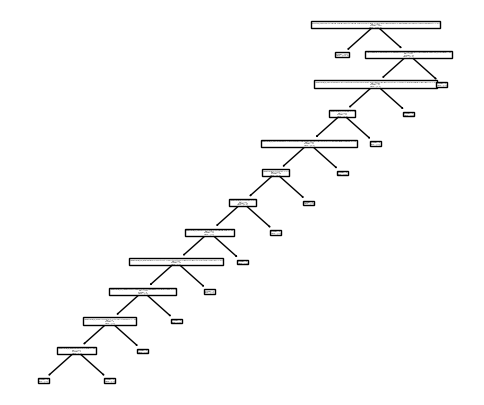

In [67]:

fig = plt.figure(figsize=(6, 5))
tree.plot_tree(dt_model,feature_names=list(X.columns))
plt.show()

In [52]:
list(X.columns)

['ID',
 "Describing the Symptoms_If you're not sure what the problem is, start by describing the symptoms:",
 'assuring_Check Engine & Warning Lights',
 'assuring_Electrical Accessories',
 'assuring_Engine',
 'assuring_Engine Performance',
 'assuring_Exterior Body',
 'assuring_Feel - I feel it (i.e. hesitation, shimmy, vibration, or a pull)',
 'assuring_Hear - I hear it (i.e. a rattle, a knock, or a squeal)',
 'assuring_Heating & Air Conditioning',
 'assuring_Lights',
 'assuring_See - I see it (i.e. oil leak, warning light, or smoke)',
 'assuring_Smell - I smell it (i.e. gasoline, rotten eggs, or burning oil)',
 'assuring_Steering & Handling',
 'assuring_Tires & Wheels',
 'assuring_Transmission',
 "assuring_Ugh! - It won't start",
 'assuring_Upholstery & Interior',
 'diagnosing symptom_Here are some common interior problems',
 'diagnosing symptom_What do you feel?',
 'diagnosing symptom_What do you see?',
 'diagnosing symptom_What happens when you try to start the vehicle?',
 'diagnosi

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print('train acc', train_acc)
print('test acc', test_acc)

train acc 1.0
test acc 0.9983416252072969


In [ ]:
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(dt_model)
plt.show()